# ML_unsupervised
IT Academy T8.1

# Algoritmes d’aprenentatge NO supervisat: Agrupació

## Càrrega de dades

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn



In [53]:
import warnings

# Ignora les advertències amb la categoria "FutureWarning"
warnings.filterwarnings("ignore", category=FutureWarning)

# Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.




In [63]:
df = pd.read_csv("Publicacions Facebook Thailandia.csv")
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [64]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [65]:
# Explorem valors únics en cada columna
for col in df.columns:
    num_valors_unics = df[col].nunique()
    print(f"Columna '{col}' | {num_valors_unics} valors únics: {df[col].unique()}")

Columna 'status_id' | 6997 valors únics: ['246675545449582_1649696485147474' '246675545449582_1649426988507757'
 '246675545449582_1648730588577397' ...
 '1050855161656896_1060126464063099' '1050855161656896_1058663487542730'
 '1050855161656896_1050858841656528']
Columna 'status_type' | 4 valors únics: ['video' 'photo' 'link' 'status']
Columna 'status_published' | 6913 valors únics: ['4/22/2018 6:00' '4/21/2018 22:45' '4/21/2018 6:17' ... '9/21/2016 23:03'
 '9/20/2016 0:43' '9/10/2016 10:30']
Columna 'num_reactions' | 1067 valors únics: [529 150 227 ... 558 570 415]
Columna 'num_comments' | 993 valors únics: [  512     0   236     6   614   453     1     9     2     4    11   100
   256   173   166    15     7    36    78   300    14     8   137   292
    72    39   181   210    12   456    60   235   444    21   255   136
   327   284   114    81   193    32   258    13   259   468   130   251
   247    89   341   316   368    76    63   171   461   540     3    10
    18    16    25  

### Explicació de les variables de cada columna

1. status_id:

Aquesta columna sembla ser un identificador únic per a cada publicació d'estat o post a les xarxes socials. És una cadena de text que pot ser utilitzada per identificar de manera única cada publicació.

2. status_type: 

Aquesta columna descriu el tipus de publicació, com ara "video", "photo", "link" o "status". Pot ser útil per analitzar quins tipus de continguts funcionen millor en les xarxes socials.

3. status_published:

Aquesta columna conté les dates i les hores de publicació de les entrades a les xarxes socials. És útil per analitzar els horaris de publicació més efectius.

4. num_reactions: 

Aquesta columna representa el nombre de reaccions (com "m'agrada", "està bé", "em fa gràcia", etc.) que ha rebut una publicació. Això pot ser útil per avaluar l'engagement de les publicacions.

5. num_comments: 

Aquesta columna indica el nombre de comentaris que ha rebut una publicació. 

6. num_shares: 

Aquesta columna representa el nombre de vegades que s'ha compartit una publicació a través de les xarxes socials. Això pot indicar quines publicacions es van fer virals o van ser compartides àmpliament.

7. num_likes: 

Aquesta columna indica el nombre de "m'agrada" que ha rebut una publicació. Aquesta és una forma específica de reacció que pot ser important per a moltes empreses i pàgines.

8. num_loves: 

Aquesta columna compta el nombre de reaccions de "està bé" o "em fa molta estima" que ha rebut una publicació. Aquest tipus de reacció reflecteix sentiments positius.

9. num_wows: 

Aquesta columna compta el nombre de reaccions de "em fa gràcia" que ha rebut una publicació. 
10. num_hahas: 

Aquesta columna indica el nombre de reaccions d'"em fa gràcia" o "m'he rigut" que ha rebut una publicació. 
11. num_sads:

Aquesta columna compta el nombre de reaccions de "està trist" que ha rebut una publicació. 

12. num_angrys:

Aquesta columna compta el nombre de reaccions d'"em fa enfadar" o "m'enfado" que ha rebut una publicació.

13 - 16. Column1, Column2, Column3, Column4:

Aquestes columnes no semblen contenir dades vàlides, ja que tots els seus valors són NaN (Not a Number), la qual cosa indica que no tenen informació vàlida.

## Neteja de dades

Les últimes columnes ('Column1' - 'Column4') estan plenes de valors nuls. Procedim a eliminar-les.

In [66]:
columnes_a_eliminar = ['Column1', 'Column2', 'Column3', 'Column4']
df = df.drop(columns=columnes_a_eliminar)

In [67]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


Les columnes 'status_published', 'status_type' i 'status_id' són objectes i la resta int64.

In [69]:
# Busquem duplicats
df.duplicated().sum()

51

In [70]:
# Esborrar els 51 duplicats
df = df.drop_duplicates()

In [71]:
# Comprovem si s'han esborrat els duplicats
df.duplicated().sum()

0

## Preparació de dades


In [72]:
df.shape

(6999, 12)

In [73]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [74]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [75]:
# Backup
df_backup = df.copy()

In [76]:
# Separem la data i l'hora de la columna 'status_published'
df[['date', 'time']] = df['status_published'].str.split(' ', expand=True)

# Eliminem la columna original 'status_published' si ja no la necessitem
df.drop('status_published', axis=1, inplace=True)

df

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,time
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,4/22/2018,6:00
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,4/21/2018,22:45
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,4/21/2018,6:17
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,4/21/2018,2:29
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,4/18/2018,3:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0,9/24/2016,2:58
7046,1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0,9/23/2016,11:19
7047,1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0,9/21/2016,23:03
7048,1050855161656896_1058663487542730,photo,351,12,22,349,2,0,0,0,0,9/20/2016,0:43


In [77]:
df.columns


Index(['status_id', 'status_type', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'date', 'time'],
      dtype='object')

Ara mourem les columnes 'date', 'time' a la tercera posició, després de 'status_type' (on estava originalment).

In [78]:
# Obtenir la llista de les columnes actuals
columnes_actuals = df.columns.tolist()

# Definir la nova disposició de les columnes
nova_disposicio = columnes_actuals[:2] + ['date', 'time'] + columnes_actuals[2:]

# Reordenar les columnes segons la nova disposició
df = df[nova_disposicio]


In [79]:
df.columns

Index(['status_id', 'status_type', 'date', 'time', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'date', 'time'],
      dtype='object')

In [80]:
# Esborrem les dues últimes columnes, 'date', 'time'.
df = df.iloc[:, :-2]

In [81]:
df.columns

Index(['status_id', 'status_type', 'date', 'time', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

Ara comprovarem les dades corresponents a les reaccions. Columnes:
1. 'num_reactions'
2. 'num_comments'
3. 'num_shares'
4. 'num_likes'
5. 'num_loves'
6. 'num_wows',
7. 'num_hahas',
8. 'num_sads',
9. 'num_angrys'

In [82]:
df.describe().round(1)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.0,6999.0,6999.0,6999.0,6999.0,6999.0,6999.0,6999.0,6999.0
mean,225.0,225.6,40.3,209.9,12.8,1.3,0.7,0.2,0.1
std,452.9,892.7,132.0,439.6,40.1,8.7,4.0,1.5,0.7
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,17.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0
50%,58.0,4.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0
75%,216.0,22.0,4.0,182.0,3.0,0.0,0.0,0.0,0.0
max,4710.0,20990.0,3424.0,4710.0,657.0,278.0,157.0,51.0,31.0


Comptabilitzem, de les 6999 línies, una mitjana de 255 reactions i comentaris per cada publicació, amb mitjana també de 40 shares, 209 likes, 12 loves, 1 wow, i menys d'1 hahas, sads i angrys.

Com observació, les reaccions i comentaris tenen pareguda mitjana però no igual distribució. Si veiem els valors màxims (última fila), comprovem que el màxim de comentaris (20990) quadruplica els màxim de likes (4710). Això pot tenir diverses explicacions, com per exemple un tema polèmic que desplega molts comentaris però no tants likes.

Ara agruparem les dades segons la columna status_type per explorar els format de les publicacions.

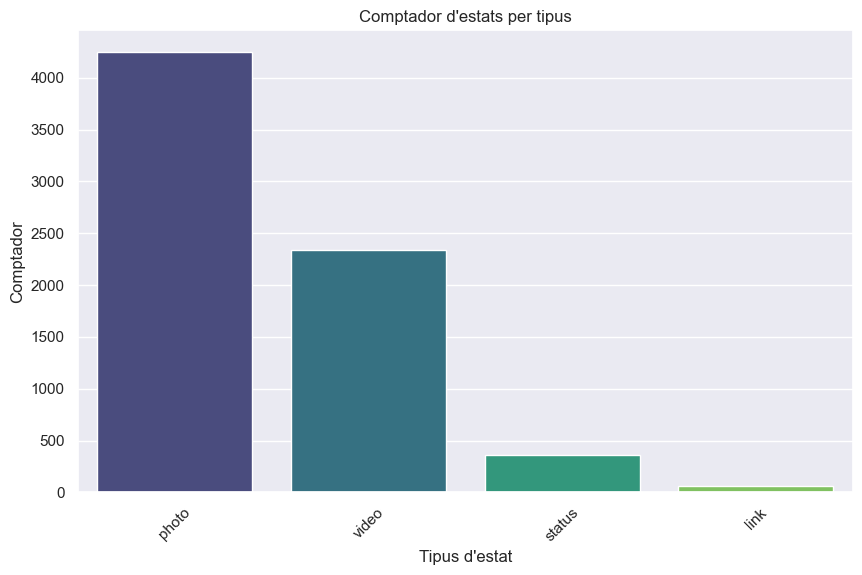

In [83]:
# Gràfic de barres
counts = df['status_type'].value_counts()

plt.figure(figsize=(10, 6))  

sns.barplot(x=counts.index, y=counts.values, palette="viridis")

# Labels
plt.xlabel('Tipus d\'estat')
plt.ylabel('Comptador')
plt.title('Comptador d\'estats per tipus')

plt.xticks(rotation=45)

plt.show()







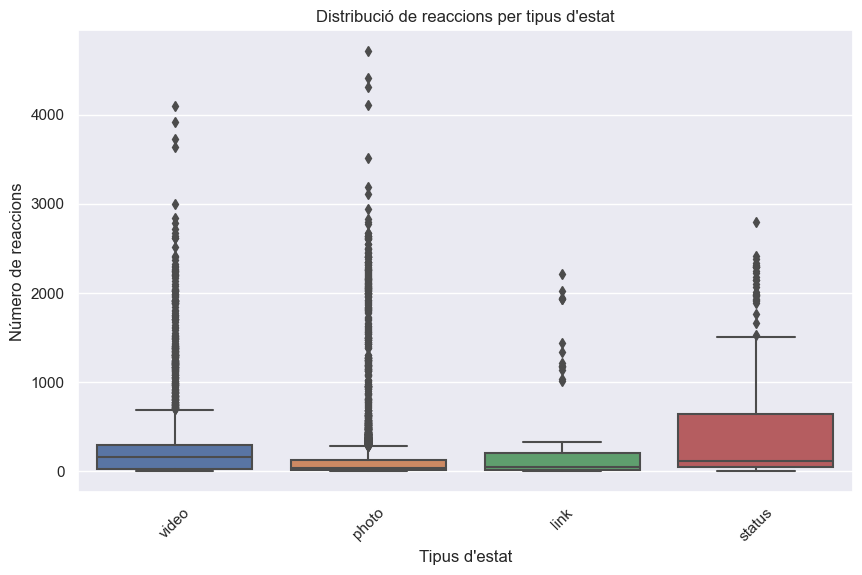

In [84]:
# Comprovem la distribució de les dades i els outliers existents 
sns.boxplot(x='status_type', y='num_reactions', data=df)
plt.xlabel('Tipus d\'estat')
plt.ylabel('Número de reaccions')
plt.title('Distribució de reaccions per tipus d\'estat')
plt.xticks(rotation=45)
plt.show()


Veiem que tots els tipus de estat contenen outliers i que la distribució dels valors semble no gaussiana. . Per tant, haurem de comprovar mitjançant el test de Shapiro

### Test de Shapiro-Wilk
Realitzem aquesta prova per saber si la mostra de dades té una distribució gaussiana.

#### Suposicions

Les observacions de cada mostra són independents i distribuïdes de manera idèntica (iid).
#### Interpretació

#### H<sub>0</sub> : la mostra té una distribució gaussiana.

#### H<sub>1</sub>: la mostra no té una distribució gaussiana.

In [85]:
from scipy import stats
from scipy.stats import shapiro

df_int = df[['num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys']]

In [86]:
# Shapiro-Wilk Normality Test

from scipy.stats import shapiro

for column in df_int.columns:
    stat, p = shapiro(df[column])
    
    print("*"*50)
    print(column, "| Tipus de dada:", df_int[column].dtypes)
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('La distribució probablement ÉS gaussiana')
    else:
        print('La distribució probablement NO és gaussiana')
    print("*"*50,"\n")

**************************************************
num_reactions | Tipus de dada: int64
stat=0.508, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
num_comments | Tipus de dada: int64
stat=0.262, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
num_shares | Tipus de dada: int64
stat=0.338, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
num_likes | Tipus de dada: int64
stat=0.487, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
num_loves | Tipus de dada: int64
stat=0.353, p=0.000
La distribució probablement NO és gaussiana
****************************************

/Users/eda/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


En efecte, cap de les variables conté distribució gaussiana en els valors. Per tant, i donat que hi ha existència d'outliers, es triarà el mètode Robust Scaler pel processament. Primer, farem un procés de dummificació per poder processar la variable categòrica "status_type"

In [87]:
# Backup
df_backup_prepro = df.copy()

In [88]:
df

,status_id,status_type,date,time,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018,6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018,22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018,6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018,2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018,3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016,2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016,11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016,23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016,0:43,351,12,22,349,2,0,0,0,0


In [89]:
df_backup_prepro

,status_id,status_type,date,time,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018,6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018,22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018,6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018,2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018,3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016,2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016,11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016,23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016,0:43,351,12,22,349,2,0,0,0,0


## Preprocessament de dades

El primer pas ara serà dummificar la variable categòrica "status_type", per tal convertir variables categòriques en variables numèriques binàries (0 o 1) per tal que puguin ser utilitzades després pels algoritmes d'aprenentatge automàtic.

In [90]:
df = pd.get_dummies(df, prefix= 'type', columns = ["status_type"])
df

,status_id,date,time,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video
0,246675545449582_1649696485147474,4/22/2018,6:00,529,512,262,432,92,3,1,1,0,0,0,0,1
1,246675545449582_1649426988507757,4/21/2018,22:45,150,0,0,150,0,0,0,0,0,0,1,0,0
2,246675545449582_1648730588577397,4/21/2018,6:17,227,236,57,204,21,1,1,0,0,0,0,0,1
3,246675545449582_1648576705259452,4/21/2018,2:29,111,0,0,111,0,0,0,0,0,0,1,0,0
4,246675545449582_1645700502213739,4/18/2018,3:22,213,0,0,204,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,9/24/2016,2:58,89,0,0,89,0,0,0,0,0,0,1,0,0
7046,1050855161656896_1061334757275603,9/23/2016,11:19,16,0,0,14,1,0,1,0,0,0,1,0,0
7047,1050855161656896_1060126464063099,9/21/2016,23:03,2,0,0,1,1,0,0,0,0,0,1,0,0
7048,1050855161656896_1058663487542730,9/20/2016,0:43,351,12,22,349,2,0,0,0,0,0,1,0,0


Veiem com les columnes type_link, type_photo, type_status i type_video han estat creades. Ara podem continuar aplicant les tècniques de preprocessament.

El segon pas serà aplicar la tècnica Robust Scaler, una mètrica robusta adequada per dades amb outliers i  distribucions no gaussianes.

El càlcul del "Robust Scaler" implica restar la mediana de les dades i dividir pel rang interquartílic (IQR), que és la diferència entre el tercer quartil (75th percentile) i el primer quartil (25th percentile). Això redueix l'impacte dels outliers en l'estandardització.

In [91]:
from sklearn.preprocessing import RobustScaler

df_robus = ['num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys']

# Inicialitza i aplica el RobustScaler
robus = RobustScaler().fit(df[df_robus])

df[df_robus] = robus.transform(df[df_robus])
df

,status_id,date,time,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video
0,246675545449582_1649696485147474,4/22/2018,6:00,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1
1,246675545449582_1649426988507757,4/21/2018,22:45,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
2,246675545449582_1648730588577397,4/21/2018,6:17,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1
3,246675545449582_1648576705259452,4/21/2018,2:29,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
4,246675545449582_1645700502213739,4/18/2018,3:22,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,9/24/2016,2:58,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
7046,1050855161656896_1061334757275603,9/23/2016,11:19,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0,0,1,0,0
7047,1050855161656896_1060126464063099,9/21/2016,23:03,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0,0,1,0,0
7048,1050855161656896_1058663487542730,9/20/2016,0:43,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0,0,1,0,0


In [92]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
num_reactions,6999.0,0.839169,2.275783,-0.291457,-0.206030,0.0,0.793970,23.376884
num_comments,6999.0,10.070549,40.579228,-0.181818,-0.181818,0.0,0.818182,953.909091
num_shares,6999.0,10.064652,33.011726,0.000000,0.000000,0.0,1.000000,856.000000
num_likes,6999.0,0.926950,2.663941,-0.345455,-0.242424,0.0,0.757576,28.200000
num_loves,6999.0,4.250512,13.368957,0.000000,0.000000,0.0,1.000000,219.000000
num_wows,6999.0,1.252893,8.725551,0.000000,0.000000,0.0,0.000000,278.000000
num_hahas,6999.0,0.697957,3.970912,0.000000,0.000000,0.0,0.000000,157.000000
num_sads,6999.0,0.232605,1.481105,0.000000,0.000000,0.0,0.000000,51.000000
num_angrys,6999.0,0.110159,0.688582,0.000000,0.000000,0.0,0.000000,31.000000
type_link,6999.0,0.009001,0.094454,0.000000,0.000000,0.0,0.000000,1.000000


Ara compararem el dataset original (del qual existeix el backup df_backup) i les dades preprocessades.

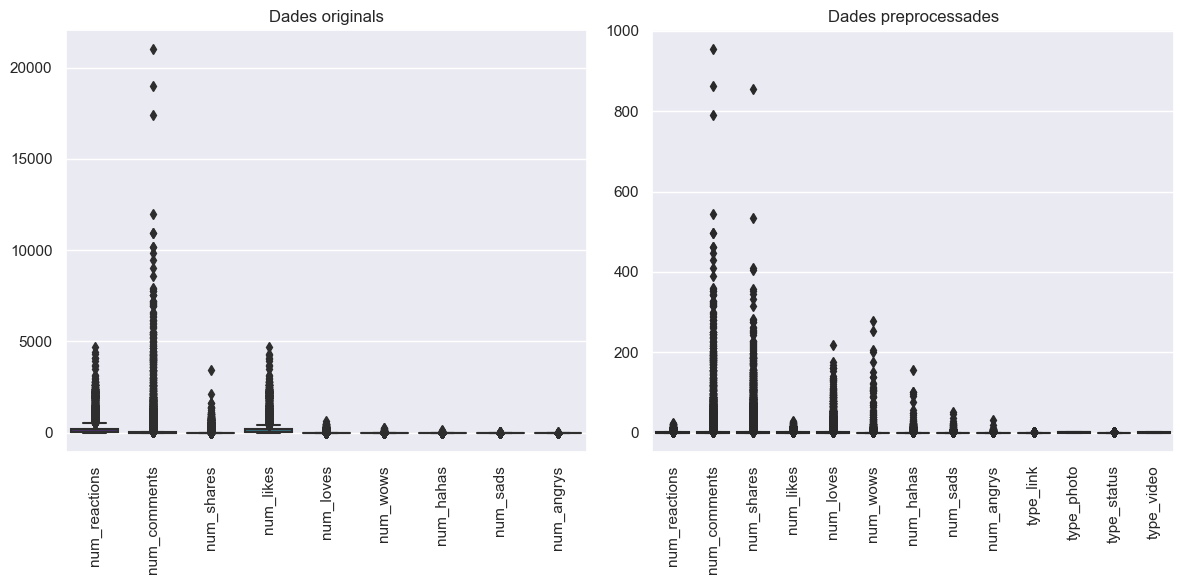

In [93]:
# Canvas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot del dataset original (df_backup)
sns.boxplot(data=df_backup, ax=axes[0], palette='viridis')  
axes[0].set_title('Dades originals')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Boxplot del dataset modificat (df)
sns.boxplot(data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Dades preprocessades')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


Veiem que els valors estan normalitzats però encara existeixen molts outliers.

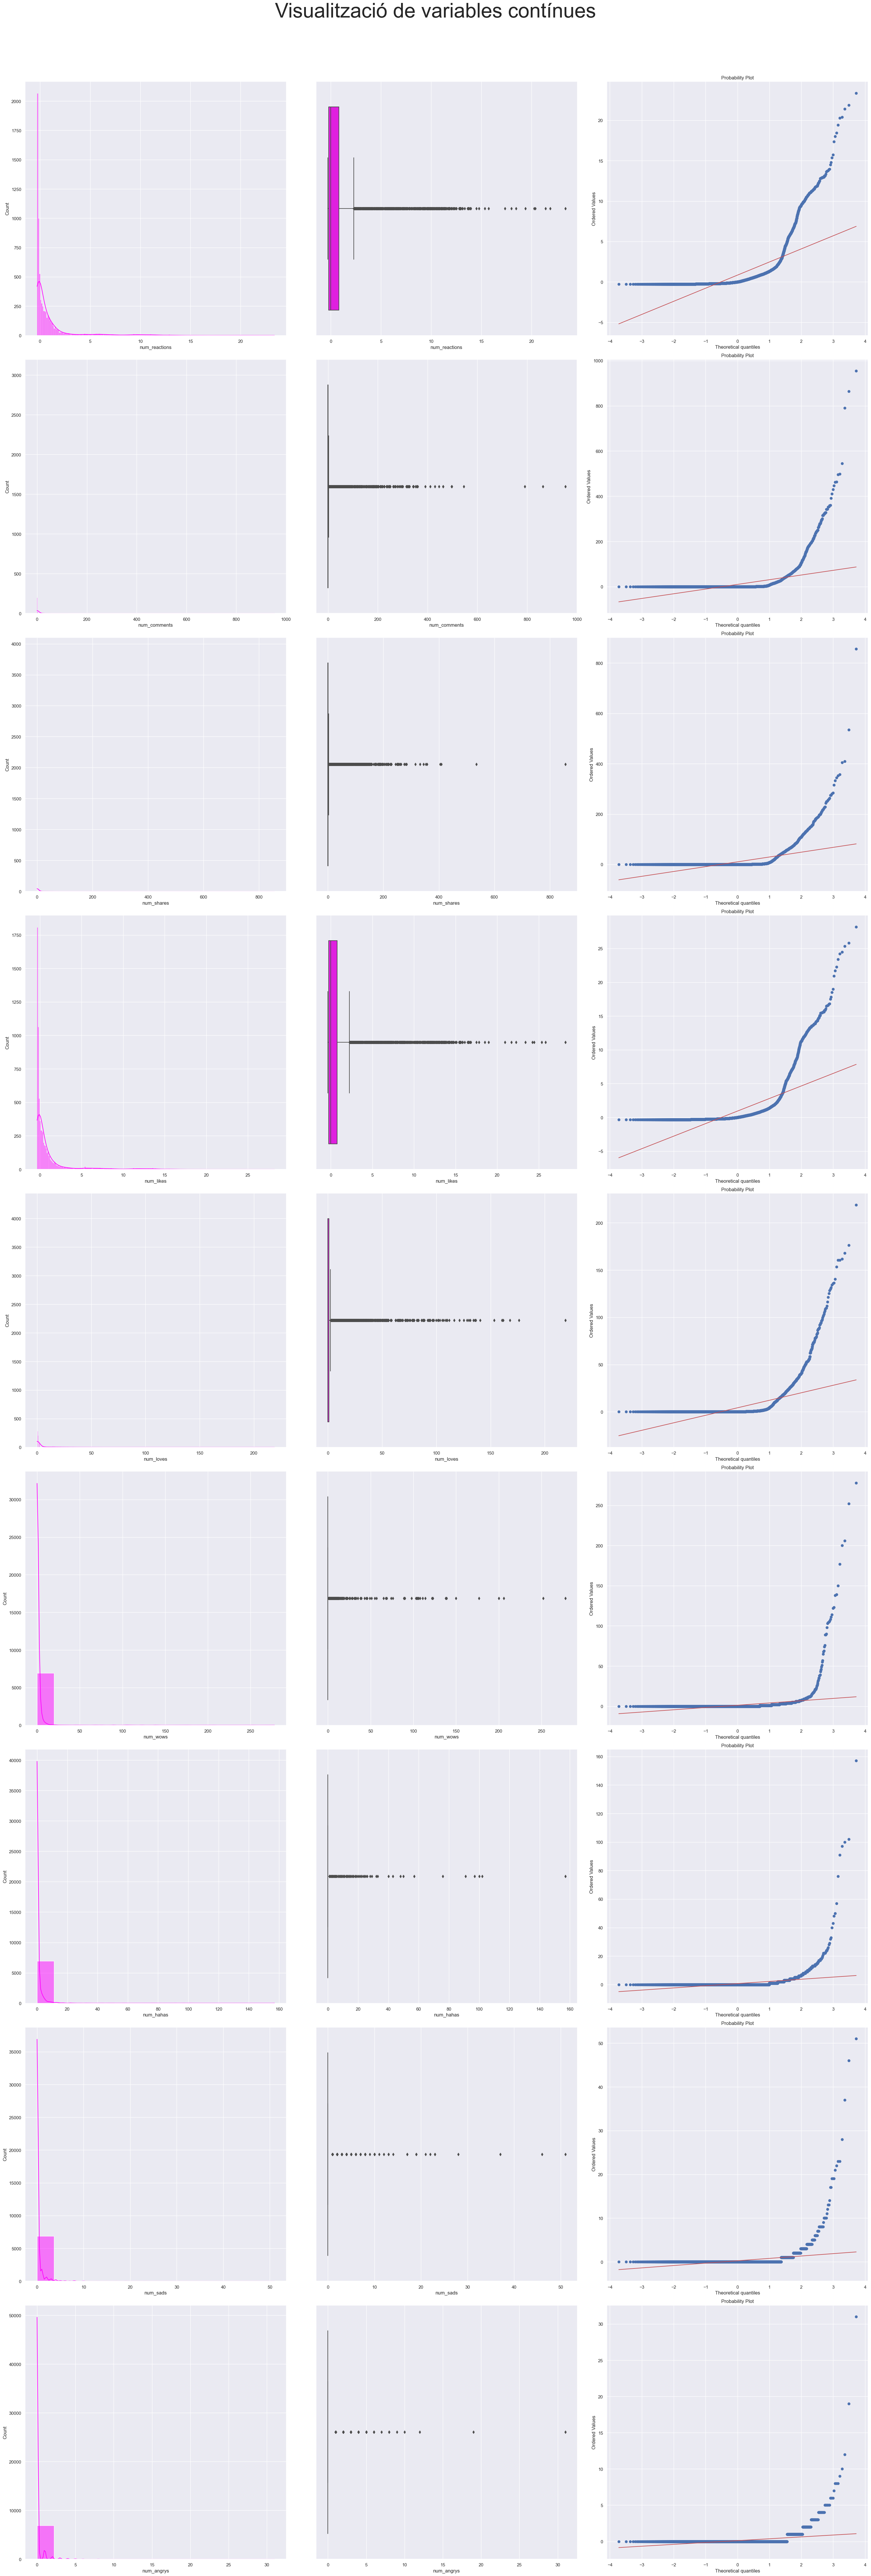

In [94]:
import scipy.stats as stats

# Visualització de les variables contínues
variables_contínues = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

fig, ax = plt.subplots(9, 3, figsize=(30, 90))

for index, variable in enumerate(variables_contínues):
    sns.histplot(df[variable], ax=ax[index, 0], color='magenta', kde=True)
    sns.boxplot(x=df[variable], ax=ax[index, 1], color='magenta')
    stats.probplot(df[variable], plot=ax[index, 2])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualització de variables contínues", fontsize=50)
plt.show()


In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df)
plt.title('Dataset "DF" Post Preprocessament\n', fontsize = 17)
plt.xticks(rotation=45)
plt.xlabel('Variables del dataset', fontsize = 13)
plt.show()

Aquí comprovem el que s'inferia en el gràfic anterior: encara existeix una quantitat considerable d'outliers. A continuació, realitzarem un anàlisi PCA.

## PCA (Anàlisi de components principals)
L'anàlisi de components principals (PCA, per les seves sigles en anglès) és una tècnica d'anàlisi de dades que es fa servir per reduir la dimensionalitat de les dades, identificant les direccions principals (components principals) en les quals les dades varien més. 

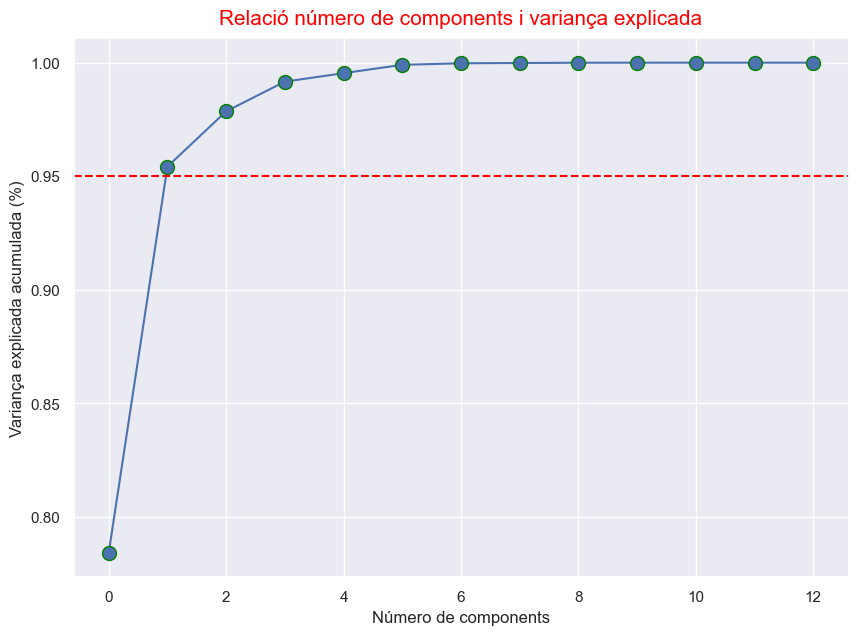

In [96]:
# Seleccionem les columnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# PCA
pca = PCA().fit(df_numeric)
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o", markersize=10, markeredgecolor='green')
plt.axhline(0.95, color="red", linestyle="--")
plt.xlabel('Número de components')
plt.ylabel('Variança explicada acumulada (%)')
plt.title("Relació número de components i variança explicada", fontsize=15, pad=10, color='red')
plt.show()

Hem aplicat PCA a les dades i busquem una explicació del 95% de la variància. La gràfica revela que amb dos components podem assolir aquest objectiu. Tot i així, realitzarem càlculs per confirmar el nombre de components principals requerits. 

El model PCA ens permet reduir la dimensionalitat de les dades i mantindre'n la informació més rellevant. La línia vermella indica el punt on aconseguim el 95% de la variança explicada.

In [97]:
pca = PCA(.95).fit(df_numeric)
print("El nombre de PCA per un 95% de variança és:", pca.n_components_)
print("Els Percentatges de variança acumulada explicada amb 2 PCA's és:", np.cumsum(pca.explained_variance_ratio_))

El nombre de PCA per un 95% de variança és: 2
Els Percentatges de variança acumulada explicada amb 2 PCA's és: [0.78422447 0.95422252]


Ara el que farem serà visualitzar l'informació en un nou dataframe un cop haguem transformades les nostres dades del dataset en les coordenades dels components principals.

In [99]:
df_pca = pd.DataFrame(pca.transform(df_numeric), columns=["PCA1", "PCA2"], index=df_numeric.index)
df_pca.head(10)


,PCA1,PCA2
0,48.146219,39.281738
1,-14.876282,-2.242583
2,3.375964,3.441262
3,-14.880365,-2.249211
4,-14.270582,-1.396058
5,-14.268003,-1.786538
6,22.841430,1.439380
7,11.242356,-2.364494
8,-14.502368,-1.797471
9,-14.207958,-2.035741


In [51]:
df_pca.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
PCA1,6999.0,-0.0,48.69,-14.89,-14.83,-14.53,-12.95,759.27
PCA2,6999.0,-0.0,22.67,-559.18,-2.33,-2.26,-1.75,594.72


## K-means

Abans d'aplicar el model K-means, és crucial determinar el nombre òptim de grups mitjançant el mètode del "colze", que identifica el punt on afegir més clusters ja no millora significativament el model.

L'objectiu del l'algorisme K-means és la partició no supervisada de les dades en k-grups per a la identificació de patrons relacionats amb els objectius de l'anàlisi de dades.

El "SSE" (Sum of Squared Errors) es fa servir directament com un indicador de la qualitat dels agrupaments realitzats per l'algoritme K-means, i l'objectiu és minimitzar-lo seleccionant el nombre de clusters adequat.

El concepte clau en aquest context és el "WCSS" (Within-Cluster Sum of Squares), que mesura la suma dels quadrats de les distàncies intracluster i proporciona la base per a la selecció de clusters òptims.

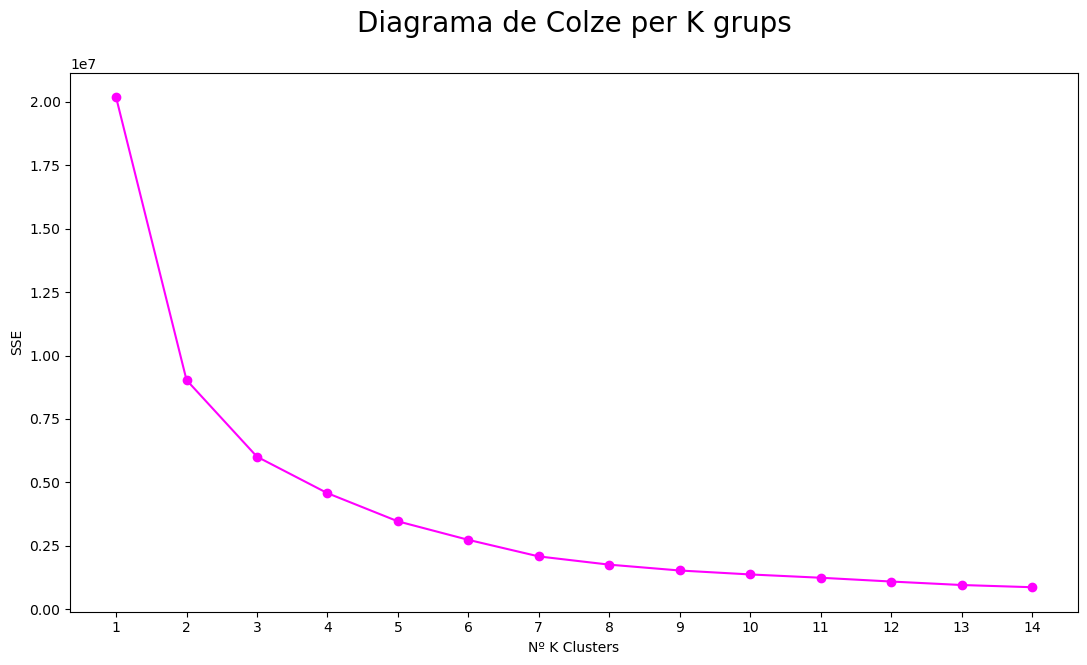

In [55]:
from sklearn.cluster import KMeans

grups = range(1, 15)
SSE = []

for i in range(1, 15):
    model = KMeans(n_clusters=i)
    model.fit(df_pca)
    SSE.append(model.inertia_)

plt.figure(figsize=(13, 7))
plt.title('Diagrama de Colze per K grups\n', fontsize=20)
plt.plot(grups, SSE, '-o', color='magenta')  
plt.xlabel('Nº K Clusters', fontsize=10)  
plt.ylabel('SSE', fontsize=10)
plt.xticks(grups)
plt.show()


In [58]:
from kneed import KneeLocator

kl = KneeLocator(grups, SSE, curve="convex", direction="decreasing")
kl.elbow

3

Com hem pogut observar en el diagrama de colze, a mesura que augmentem el nombre de clusters, el SSE (Sum of Squared Errors) comença a disminuir de manera més suau després de tres clusters: la corba comença a mostrar un canvi de pendent menys pronunciat i esdevé més plana. Aquest canvi en el comportament de la corba suggereix que tres clústers podrien ser un bon punt de referencia per definir els agrupaments de les dades.

En aquest context, el "canvi de pendent" indica que afegir més clusters més enllà de tres no proporcionaria una millora significativa en la qualitat de l'agrupament. Per tant, el punt on la corba comença a mantenir un pendent regular és un indicador que ens suggereix triar tres clusters com un nombre òptim per a la partició de les dades. 

In [100]:
# Instanciem el model K-Means amb tres clusters
km = KMeans(n_clusters=3, random_state=3)

# Pas 2: Ajustem el model K-Means als dades transformades amb PCA
km.fit(df_pca)

# Pas 3: Fem prediccions sobre les dades transformades
y_pred = km.predict(df_pca)

# Pas 4: Afegim un nou camp al dataset original amb els clusters obtinguts
df['k_grups'] = y_pred

# Mostrem les primeres files del dataset amb la nova columna de clusters
df.head()


,status_id,date,time,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video,k_grups
0,246675545449582_1649696485147474,4/22/2018,6:00,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1,2
1,246675545449582_1649426988507757,4/21/2018,22:45,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0
2,246675545449582_1648730588577397,4/21/2018,6:17,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1,0
3,246675545449582_1648576705259452,4/21/2018,2:29,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0
4,246675545449582_1645700502213739,4/18/2018,3:22,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0,0


In [101]:
df['k_grups'].value_counts()

0    6452
2     475
1      72
Name: k_grups, dtype: int64

In [115]:
def asignar_status(row):
    if row['type_link'] == 1:
        return 'link'
    elif row['type_photo'] == 1:
        return 'photo'
    elif row['type_status'] == 1:
        return 'status'
    elif row['type_video'] == 1:
        return 'video'
    else:
        return None  # Puedes decidir cómo manejar los casos en los que no se cumpla ninguna condición

# Aplica la función a cada fila del DataFrame para crear la nueva columna 'tipo_status'
df['status_type'] = df.apply(asignar_status, axis=1)
df

,status_id,date,time,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video,k_grups,status_type
0,246675545449582_1649696485147474,4/22/2018,6:00,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1,2,video
1,246675545449582_1649426988507757,4/21/2018,22:45,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0,photo
2,246675545449582_1648730588577397,4/21/2018,6:17,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1,0,video
3,246675545449582_1648576705259452,4/21/2018,2:29,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0,photo
4,246675545449582_1645700502213739,4/18/2018,3:22,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0,0,photo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,9/24/2016,2:58,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0,photo
7046,1050855161656896_1061334757275603,9/23/2016,11:19,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0,0,1,0,0,0,photo
7047,1050855161656896_1060126464063099,9/21/2016,23:03,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0,0,1,0,0,0,photo
7048,1050855161656896_1058663487542730,9/20/2016,0:43,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0,0,1,0,0,0,photo


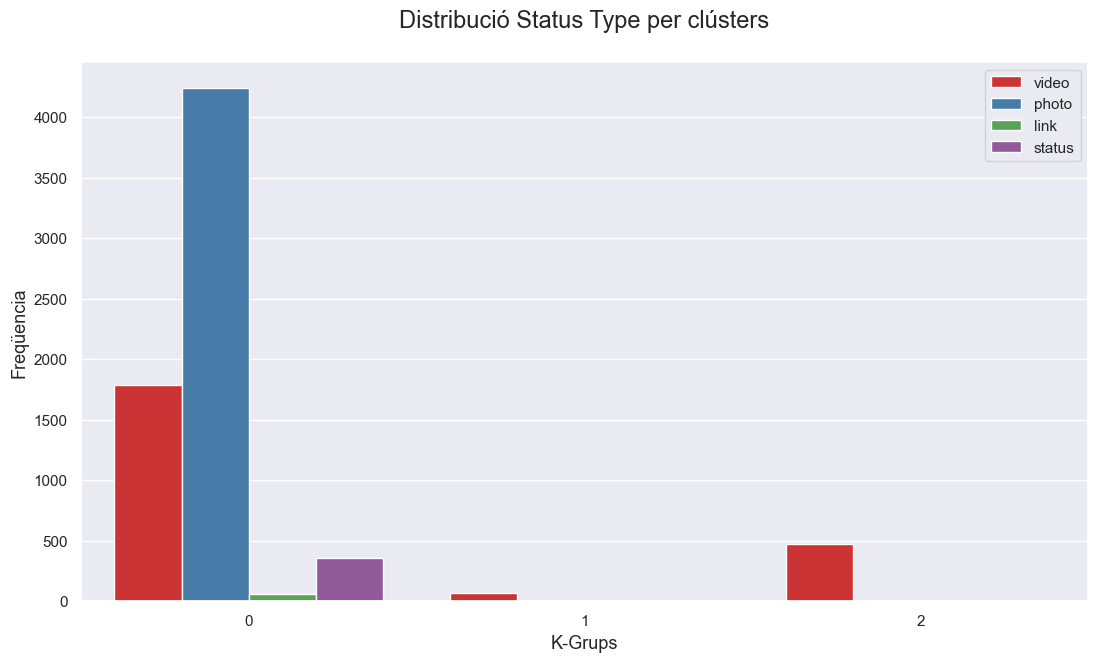

In [117]:
plt.figure(figsize = (13, 7))

sns.countplot(x="k_grups", hue="status_type", data=df, palette="Set1")
plt.title("Distribució Status Type per clústers\n", fontsize=17)
plt.ylabel("Freqüencia", fontsize=13)
plt.xlabel("K-Grups", fontsize=13)
plt.legend(loc='upper right')

plt.show()

Ara procedirem a crear un gràfic que ens mostrarà com estan distribuïdes les dades en els components principals en funció de cada cluster obtingut amb el nostre últim model.

També incorporarem els centroids dels 3 grups que hem definit amb els "k-grups".

La finalitat d'aquesta visualització és analitzar la composició dels tres grups, avaluar la seva densitat i comprendre com els punts centrals s'ajusten dins del seu grup respectiu.

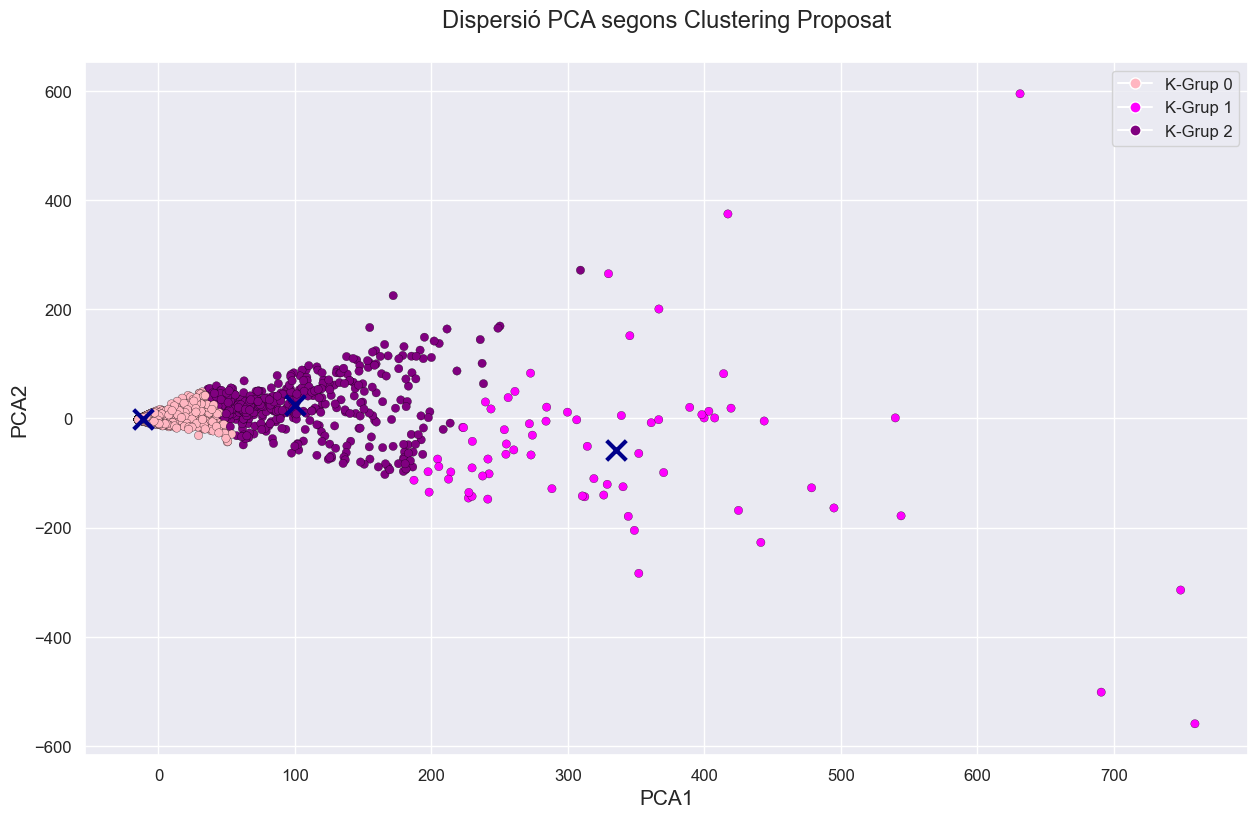

In [123]:
from matplotlib.colors import ListedColormap

centr = km.cluster_centers_
colors = ListedColormap(['#FFB6C1', '#FF00FF', '#800080'])
punts_legend = [
    plt.Line2D([0], [0], marker='o', color='w', label='K-Grup 0', markerfacecolor='#FFB6C1', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='K-Grup 1', markerfacecolor='#FF00FF', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='K-Grup 2', markerfacecolor='#800080', markersize=8)
]

plt.figure(figsize=(15, 9))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=y_pred, cmap=colors, edgecolors='black', linewidths=0.2)
plt.scatter(centr[:, 0], centr[:, 1], marker='x', s=200, linewidths=3, color='darkblue')
plt.title('Dispersió PCA segons Clustering Proposat\n', fontsize=17)  
plt.legend(handles=punts_legend, prop={'size': 12})  
plt.xlabel('PCA1', fontsize=15)
plt.ylabel('PCA2', fontsize=15)
plt.tick_params(labelsize=12)

plt.show()


En l'anàlisi de les dades, observem que el cluster "0" és clarament dominant i recull la majoria de les dades. Les reaccions positives tenen una dispersió semblant, però els "likes" són els més predominants en aquest cluster. No obstant això, es destaquen densitats més baixes en les reaccions negatives, especialment en les variables "sad" i "angry" del cluster 1. També es detecten valors atípics en tots els grups, excepte en el cluster 2 "Angrys".

Pel que fa als tipus de publicacions, el grup 0 domina clarament, amb les fotos com a categoria més prevalent. No obstant això, els vídeos estan presents en tots els grups (0, 1 i 2).

En el darrer gràfic, podem observar la dispersió de les dades dels components principals (PCA) en els 3 grups del model K-Means. El K-Grup 0 presenta la major densitat de dades al voltant dels valors 0, amb el seu centroide situat a prop d'aquests valors, ja que agrupa la major part de les dades (principalment als grups 0 i 1). D'altra banda, el K-Grup 1 i el K-Grup 2 tenen els seus centroides més centrats en el seu respectiu grup, ja que les seves dades estan més disperses cap a valors més alts.

# Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

In [125]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

Utilitzarem el dendrograma per ajudar a determinar el nombre òptim de clústers per a l'algoritme de clústers jeràrquics. Establirem un límit de 3000 publicacions i observarem quantes branques de l'arbre es tallen. Això ens proporcionarà informació sobre la quantitat de clústers que utilitzarem per provar el model posteriorment.

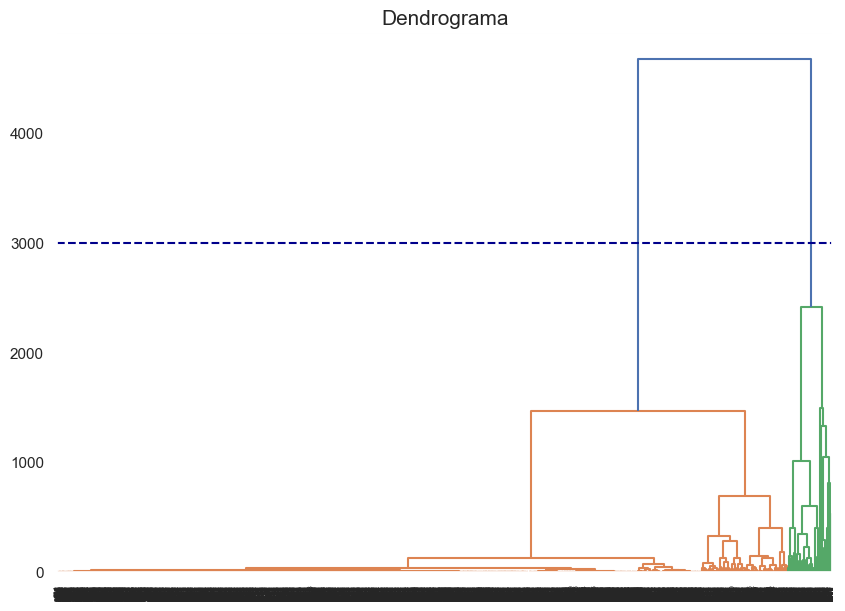

In [126]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma", fontsize=15)  
dendro = shc.dendrogram(shc.linkage(df_pca, method='ward'))
plt.axhline(y=3000, color='darkblue', linestyle='--')

plt.show()

Ara, ajustarem el model

In [127]:
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
agglo.fit(df_pca)

y_pred_agglo = agglo.labels_

y_pred_agglo

array([1, 1, 1, ..., 1, 1, 1])

In [129]:
df['k_agglo'] = y_pred_agglo
df.head()

,status_id,date,time,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video,k_grups,status_type,k_agglo
0,246675545449582_1649696485147474,4/22/2018,6:00,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1,2,video,1
1,246675545449582_1649426988507757,4/21/2018,22:45,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0,photo,1
2,246675545449582_1648730588577397,4/21/2018,6:17,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1,0,video,1
3,246675545449582_1648576705259452,4/21/2018,2:29,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0,photo,1
4,246675545449582_1645700502213739,4/18/2018,3:22,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0,0,photo,1


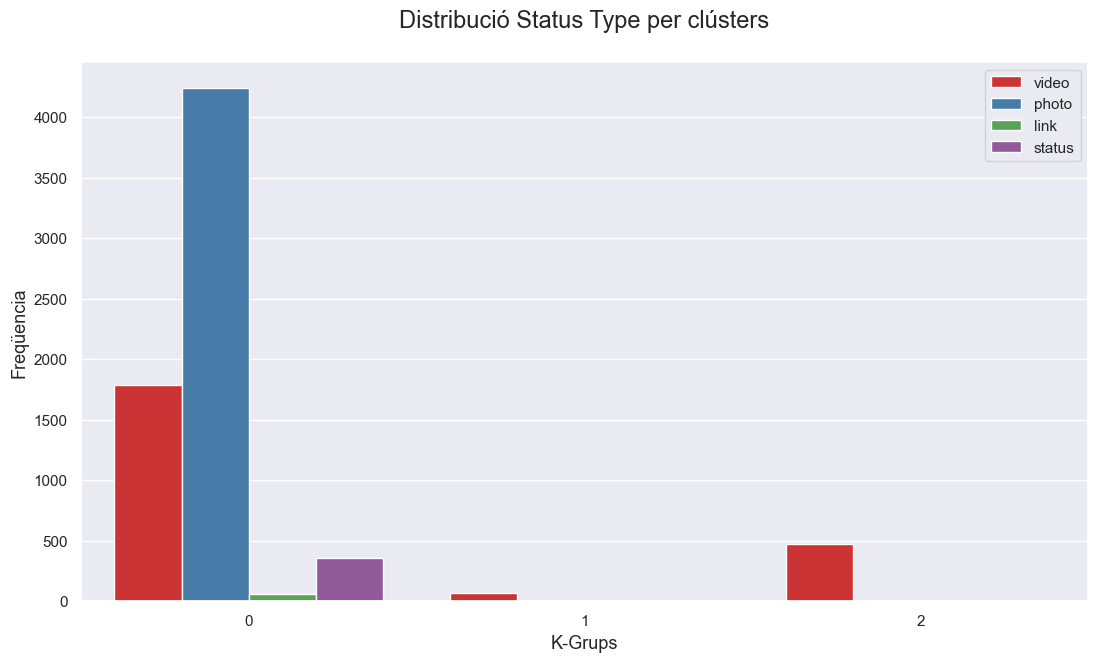

In [131]:
plt.figure(figsize = (13, 7))

sns.countplot(x="k_grups", hue="status_type", data=df, palette="Set1")
plt.title("Distribució Status Type per clústers\n", fontsize=17)
plt.ylabel("Freqüencia", fontsize=13)
plt.xlabel("K-Grups", fontsize=13)
plt.legend(loc='upper right')

plt.show()

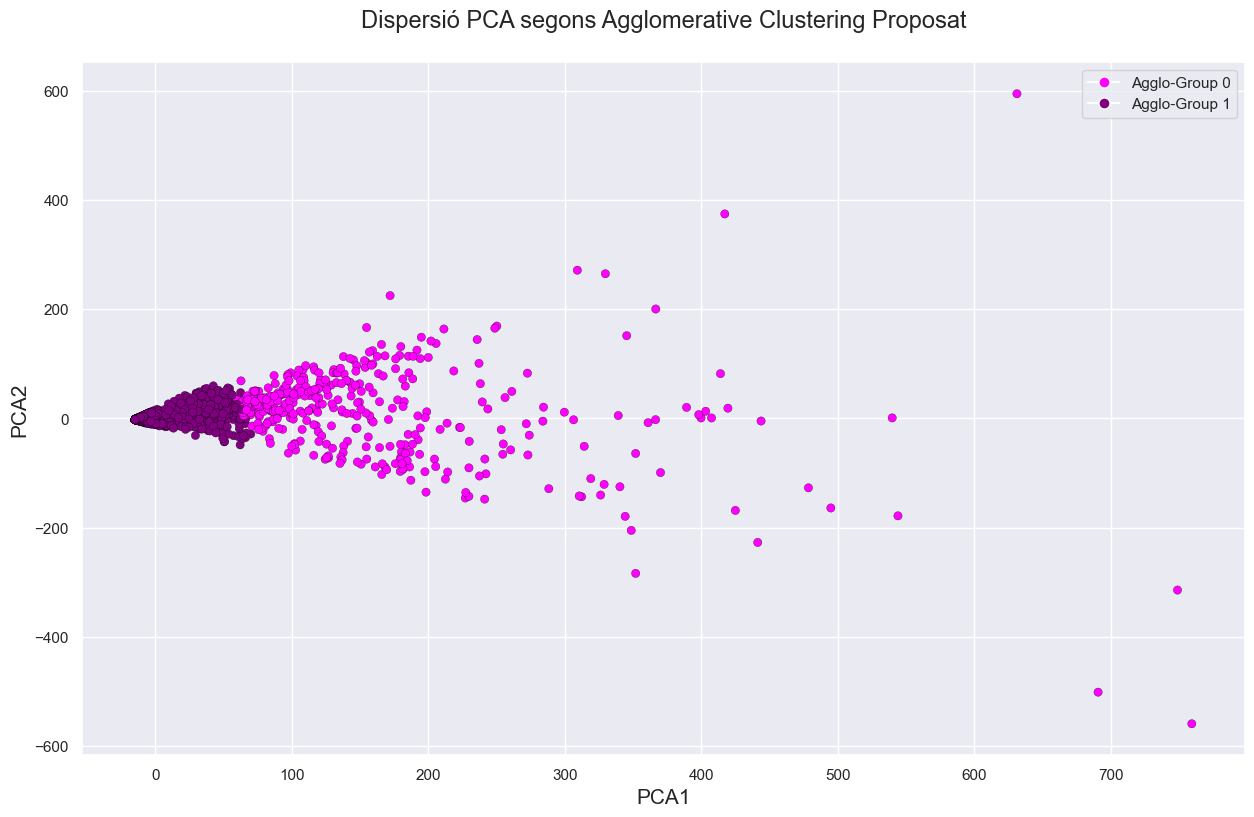

In [135]:
from matplotlib.colors import ListedColormap


colors = ListedColormap(['#FF00FF', '#800080'])
punts_legend = [plt.Line2D([0], [0], marker='o', color='w', label='Agglo-Group 0', markerfacecolor='#FF00FF', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Agglo-Group 1', markerfacecolor='#800080', markersize=8)]
                
plt.figure(figsize = (15, 9))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=y_pred_agglo, cmap=colors, edgecolors='black', linewidths=0.2)

plt.title('Dispersió PCA segons Agglomerative Clustering Proposat\n', fontsize=17)
plt.legend(handles=punts_legend)
plt.xlabel('PCA1', fontsize=15)
plt.ylabel('PCA2', fontsize=15)

plt.show()

<strong>Conclusió:</strong>
Com amb el K-Means, un clúster conté la major part de les dades amb alta densitat. El clúster més petit, "agglo grup 0", té una major dispersió de dades en comparació amb "agglo grup 1", tot i tenir menys densitat i freqüència. Les variables categòriques mostren un comportament similar als clústers de K-Means.

# Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [134]:
from sklearn.metrics import silhouette_score

km_sil = silhouette_score(df_pca, y_pred)
agglo_sil = silhouette_score(df_pca, y_pred_agglo)

print('El silhouette per el model k-means és de:', km_sil,'\nEl silhouette per el model jeràrquic és de:', agglo_sil)

El silhouette per el model k-means és de: 0.8764975986456918 
El silhouette per el model jeràrquic és de: 0.893211068560948


Analitzant aquesta mètrica, podem concloure que el model jeràrquic mostra un rendiment lleugerment superior al K-Means. En general, tots dos models exhibeixen una qualitat destacada en els seus agrupaments, ja que han aconseguit una separació efectiva dels clústers, la qual cosa es reflecteix en mètriques properes a 1. En particular, el paràmetre Silhouette obtingut pel K-Means és de 0.876, mentre que en el model jeràrquic aconsegueix gairebé 0.9.

Aquesta millora en el model jeràrquic pot ser atribuïda a la seva naturalesa de jerarquia múltiple, que permet una major granularitat en la separació de clústers. No obstant això, tots dos models han assolit resultats notables, i la elecció entre ells depèn de les necessitats i objectius específics de l'anàlisi de dades.